# Clúster Jerárquico

<img src="Tipos_Algoritmos.png"></img>

Este algoritmo consiste en generar grupos (clústers) con base en distancias entre las observaciones.
A diferencia de KMeans, este algoritmo es determinista en el sentido de que el resultado será el mismo aunque se repita $n$ veces debido a que no involucra aleatoriedad en el proceso.

**Nota :** K Means se considera un Algoritmo No Jerárquico (Partitioning Cluster / grupos por partición)

A continuación se muestra un *dendograma*, que es la representación del algoritmo.

<img src="Cluster_jerarquico.png"></img>

Esencialmente, existen dos maneras de realizar el algoritmo. Supongamos que tenemos $n$ observaciones.
1. **Aglomerativo** (a.k.a. Enfoque Bottom-Up)Iniciamos con $n$ grupos donde cada grupo es una observación. En cada paso los dos grupos más *cercanos* entre si se juntan para generar un nuevo grupo. El proceso termina hasta que quede un solo grupo.

2. **Divisivo** (a.k.a Enfoque Top-Down) Iniciamos con un grupo que contiene a las $n$ observaciones. En cada paso se separa el grupo más *lejano* y este se convierte en un nuevo grupo. El proceso termina hasta que queden $n$ grupos.

<img src="Enfoques Clustering.png"></img>

Vease que el concepto más importante en este algoritmo (y en la mayoría de los demás algoritmos) es la *distancia*.

¿Cómo se mide la distancia? Recordemos que existen diversas formas de cálcular la distancia entre dos objetos. 
La *distancia* entre dos palabras no es la misma manera en la que se cálcula la *distancia* entre dos números reales, o incluse entre dos números complejos. **A pesar de que todas cumplan con las condiciones para ser consideradas *distancias***

Sin embargo, consideremos el caso de los números reales y la distancia inducida.

Sea $V$ un espacio vectorial con una norma $\langle k, k \rangle$, y sean $x, y \in V$. La distancia (métrica) inducida por la norma $\langle k,k \rangle$ se define como

$$d(x,y) = ||y-x||$$

Pero aún más importante, ¿Cómo medir la distancia de un grupo de puntos a otro grupo de puntos?
1. **Single** (a.k.a. Nearest Point Algorithm) Toma la distancia más pequeña de todas las distancias posibles entre un elemento del primer grupo y otro elemento del segundo grupo.
2. **Complete** (a.k.a. Farthest Point Algorithm) Toma la distancia más grande de todas las distancias posibles entre un elemento del primer grupo y otro elemento del segundo grupo.
3. **Average** Toma el promedio de todas las distancias posibles entre un elemento del primer grupo y otro elemento del segundo grupo.
4. **Ward** Minimza la varianza de los grupos al agruparlos (Dificil de visualizar en una gráfica)

<img src="Linkages_Metrics.png"></img>

Vease que el algoritmo puede verse afectado dependiendo de la métrica, en la manera en la que se calcula la distancia de un grupo y otro, así como si el algoritmo es aglomerativo o divisivo.

Si desean profundizar el tema vean los siguientes enlaces:
- https://scikit-learn.org/stable/modules/clustering.html
- https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot--linkage-comparison-py
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
- https://uc-r.github.io/kmeans_clustering
- https://stats.stackexchange.com/questions/147007/a-proof-of-total-sum-of-squares-being-equal-to-within-cluster-sum-of-squares-and
- https://es.wikipedia.org/wiki/An%C3%A1lisis_de_grupos

In [16]:
# Bibliotecas y funciones necesarias para todos los ejemplos
import pandas            as pd    # Biblioteca para trabajar con DataFrames
import numpy             as np    # Biblioteca para trabajar con àlgebra lineal
import matplotlib.pyplot as plt   # Biblioteca para realizar gràficas
from matplotlib.colors   import ListedColormap
from matplotlib.cm       import get_cmap


from scipy.cluster.hierarchy import dendrogram, linkage, fcluster     # Para el primer ejemplo
from sklearn.cluster         import AgglomerativeClustering           # Clase de ClusterJerarquico
from sklearn.metrics         import accuracy_score, confusion_matrix  # Función para calcular la precisión de clasificación

import warnings
warnings.filterwarnings("ignore")

A continuación se muestra un ejemplo de Clúster Jerárquico Aglomerativo con una métrica Euclidiana con `scipy`

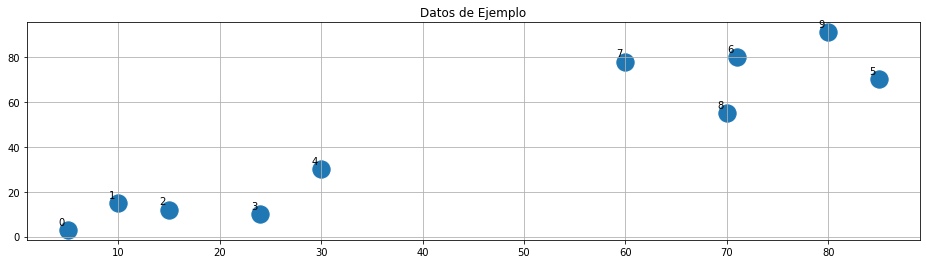

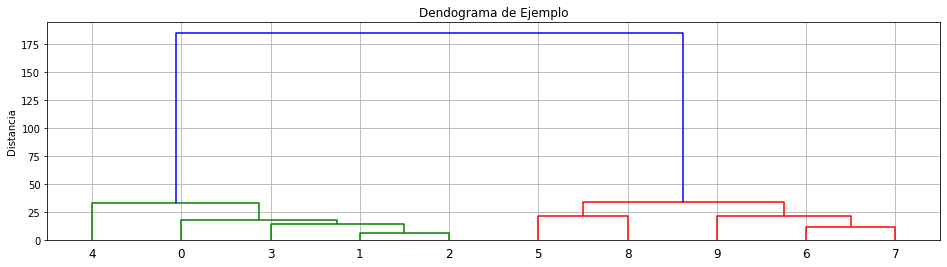

In [39]:
# Datos de Ejemplo
X = np.array([[5,3],[10,15],[15,12],[24,10],[30,30],[85,70],[71,80],[60,78],[70,55],[80,91],])
# Graficamos los puntos
plt.figure(figsize=(16, 4))
plt.title("Datos de Ejemplo")
plt.grid()
plt.scatter(X[:,0],X[:,1], label='True Position', s=300 )
# Colocamos las etiquetas
for label, x, y in zip(range(0, 10), X[:, 0], X[:, 1]):
    plt.annotate( label, xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')
plt.show()

# Generamos nuestro modelo
linked = linkage(y = X, method='ward', metric='euclidean')
# Graficamos
plt.figure(figsize=(16, 4))
plt.title("Dendograma de Ejemplo")
plt.ylabel("Distancia")
plt.grid()
dendrogram(linked, labels=range(0, 10) ) # color_threshold = 30
plt.show()

# Más ejemplos con Scipy
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

Veamos que en el ejemplo anterior podemos graficar rápidamente un dendograma.

Si nosotros revisamos el objeto `linked`, notamos que no es una clase de objeto que nos devuelva los grupos, que tenga la opción de predecir o alguna otra como los modelos anteriores. El objeto que regresa en si es una *matriz de enlace* (linkage matrix) que sirve a Scipy para graficar el dendograma.

Sin embargo, a nosotros nos gustaria que nos regresara el número del grupo al que pertenece. Para esto, utilizaremos `fcluster` colocando como parámetro la distancia que permitimos para generar los grupos.

In [40]:
linked

array([[  1.        ,   2.        ,   5.83095189,   2.        ],
       [  6.        ,   7.        ,  11.18033989,   2.        ],
       [  3.        ,  10.        ,  13.88044188,   3.        ],
       [  0.        ,  12.        ,  17.98147195,   4.        ],
       [  5.        ,   8.        ,  21.21320344,   2.        ],
       [  9.        ,  11.        ,  21.73323108,   3.        ],
       [  4.        ,  13.        ,  32.79634126,   5.        ],
       [ 14.        ,  15.        ,  33.64322616,   5.        ],
       [ 16.        ,  17.        , 185.44001726,  10.        ]])

In [21]:
# Si colocamos t=1, generamos un grupo para cada uno pues ningun par de puntos está a menos de 1 unidad de distancia!!
# En cambio, si colocamos t=15, vemos que tenemos 5 grupos diferentes
fcluster(linked, t=15, criterion='distance')

array([1, 1, 1, 1, 2, 4, 3, 3, 5, 3], dtype=int32)

Veamos que en el ejemplo anterior podemos graficar rápidamente un dendograma y por otro lado, podemos asignar los grupos.

Ahora veamos una implementación similiar con los datos `Mall_Customers` utilizando `sklearn`

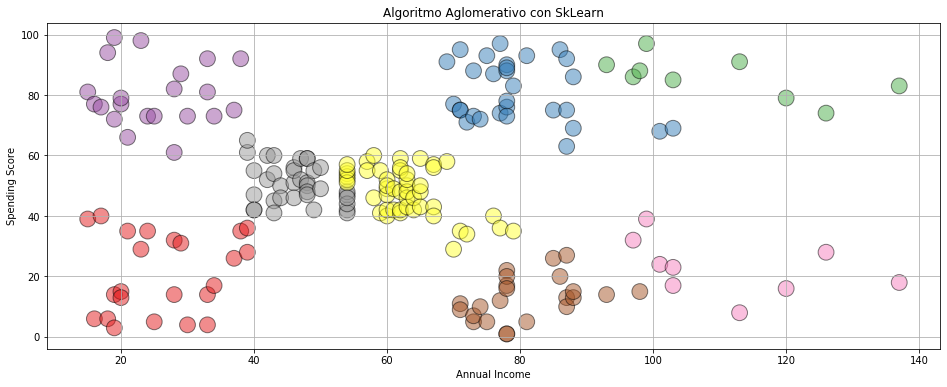

In [36]:
# Leemos los datos
datos = pd.read_csv("Mall_Customers.csv")

# Generamos nuestra matriz de diseño y ajustamos nuestro modelo
matriz_diseño       = datos.values[:,[3,4]]
ClusterAglomerativo = AgglomerativeClustering(n_clusters=8, affinity='euclidean',linkage='ward').fit( matriz_diseño )

# Graficamos
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6) )
ax.set_title("Algoritmo Aglomerativo con SkLearn")
ax.set_xlabel("Annual Income")
ax.set_ylabel("Spending Score")
ax.grid(True)
ax.scatter( x = matriz_diseño[:,0], y = matriz_diseño[:,1], c = ClusterAglomerativo.labels_, alpha = 0.5, s = 250,
           edgecolor="black", cmap = get_cmap("Set1") )
plt.show()